In [1]:
#autor: Michał Maszkowski (421428)

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

%matplotlib inline

N = 100000

In [2]:
#Ładuję i poprawiam dane:
dane = pd.read_csv('us_births_69_88.csv').values #od razu jest np.ndarray
bledne_daty = [(2,30), (2,31), (4,31), (6,31), (9,31), (11,31)] #nie ma takich dni
#przystawiam maskę do danych - usuwam niepoprawne wiersze:
dane = dane[[i for i in np.arange(dane.shape[0]) if (dane[i, 0], dane[i, 1]) not in bledne_daty], :]

(366, 3)


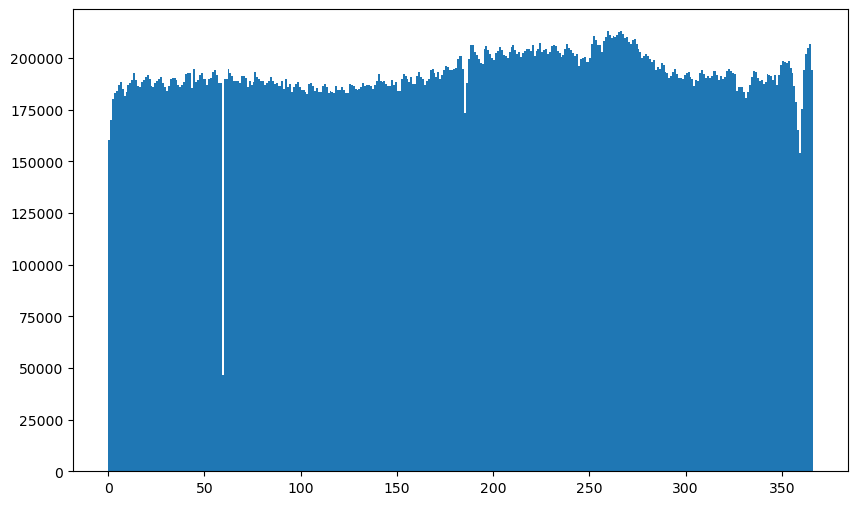

In [3]:
#Sprawdzenie danych:
print(dane.shape) #dane są dla 366 dni (poprawnych) <- ok
plt.figure(figsize=(10, 6))
plt.hist(np.arange(dane.shape[0]), 
         weights=dane[:, 2], 
         bins=np.arange(dane.shape[0] + 1))
plt.show() #"dziura" jest 29. lutego, bo występuje on rzadko

In [4]:
#korzystam z algorytmu przedstawionego w notatce: github.com/lukaszgrad/rpis2022/blob/main/lab2/notes_2a.pdf
l_dni = dane.shape[0]
zliczenia = dane[:, 2] #//mogłaby być ta tablica const - nie wiem czy jest odpowiednik w pythonie i czy przyspiesza
max_liczba_narodzin = np.max(zliczenia)

def sample_not_uniformly():
    dzien = random.randint(0, l_dni - 1) #losuję jednorodnie dzień
    #sprawdzam, czy go odrzucę:
    if random.randint(1, max_liczba_narodzin) <= zliczenia[dzien]:
        return dzien #jest wylosowany
    return sample_not_uniformly() #wpp odrzucam i losuję jeszcze raz

def emp_dates():
    s = set()
    for i in range(l_dni + 1):
        dzien = sample_not_uniformly()
        if dzien in s:
            return [(i + 1), dzien]
        else:
            s.add(dzien)

wyniki = [emp_dates() for _ in range(N)]
emp_sample = [wyniki[i][0] for i in range(len(wyniki))]

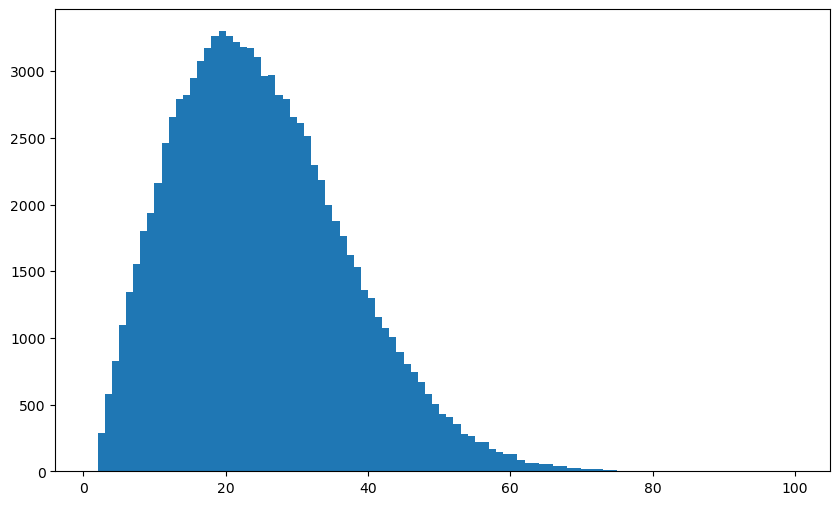

10 najczęstszych wartości: [19 20 18 21 22 17 23 24 16 26]
Wartość średnia: 24.55109


In [5]:
#Poniższe mocno inspirowane tym: github.com/lukaszgrad/rpis2022/blob/main/lab1/Lab01_solution.ipynb
plt.figure(figsize=(10, 6))
plt.hist(emp_sample, bins=range(1, 101))
plt.show()

# numpy version
vals, counts = np.unique(emp_sample, return_counts=True)
k_counts_numpy = vals[np.argsort(counts)][::-1]

print('10 najczęstszych wartości: {}'.format(k_counts_numpy[:10]))

print('Wartość średnia: {}'.format(np.mean(emp_sample)))

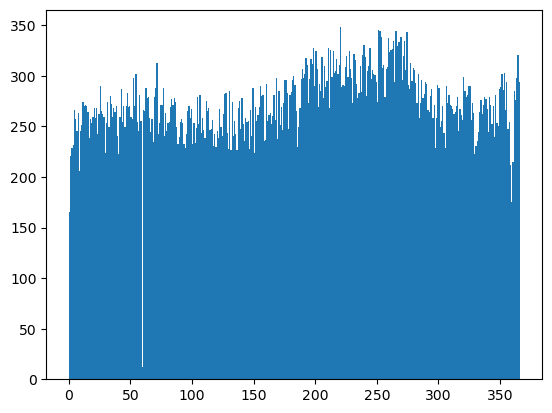

In [6]:
sampled_days = [wyniki[i][1] for i in range(len(wyniki))]

plt.hist(sampled_days, bins=range(0, 367));